In [1]:
## modelagem

## Pergunta 3: Fazendo a previsão dos dados

### Para fazer a previsão dos dados, vou criar um modelo:

#### Considerando que os grupos de bairros e os tipos de quartos concentram valores mais altos de anúncio, vou modelar uma regressão linear para tentar prever o valor dos anúncios. 

#### Para fazer essa previsão, vou separar 80% dos dados para o treinamento e 20% deles para testes.

#### Além disso, aproveitando a provocação do enúnciado, resolvi escolher um Random Forest como modelo de classificação.

#### Usarei as métricas de MAE, RMSE e R² para comparar os modelos!

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import pickle

In [3]:
def avaliar_modelo(y_true, y_pred, modelo_nome):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"📊 {modelo_nome} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")
    print("-" * 40)

In [4]:
df = pandas.read_csv("teste_indicium_precificacao.csv")

In [5]:
## A regressão linear não funciona muito bem com dados faltantes, então vou  tirar os valores nulos dos dados
df = df.dropna()

In [6]:
df

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48781,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48789,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48798,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48804,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [7]:
## Transformando as variáveis categóricas em numéricas para poder usar na regressão
df = pandas.get_dummies(df, columns=['bairro_group', 'room_type'], drop_first=True)

In [8]:
# Distribuição sem suavização dos outliers
#plt.figure(figsize=(5, 5))
#sns.histplot(df['price'], bins=40, kde=True)
#plt.title("Distribuição dos Preços por Noite")
#plt.xlabel("Preço")
#plt.ylabel("Quantidade de registros")
#plt.show()

In [9]:
# Aprendi durante esse exercício! Aregressão linear é sensível à outliers e, ao invés de eu retirar os dados, resolvi utilizar
# uma função log que suavira a distribuição dos dados
df['price'] = np.log1p(df['price'])

In [10]:
# Distribuição depois de aplicar log ao valor de preço para suavizar os outliers
#plt.figure(figsize=(5, 5))
#sns.histplot(df['price'], bins=40, kde=True)
#plt.title("Distribuição dos Preços por Noite")
#plt.xlabel("Preço")
#plt.ylabel("Quantidade de registros")
#plt.show()

## Modelando utilizando Bairro Group, Room Type

In [11]:
## Seleção de Features, aqui vou transformar todos os grupos de bairros em uma feature distinta e todos os tipos de quarto em outra feature
features = [col for col in df.columns if col.startswith('bairro_group_') or col.startswith('room_type_')]

predict = 'price'

In [12]:
## Separando dados de treino e t este
X_train, X_test, y_train, y_test = train_test_split(df[features], df[predict], test_size=0.2, random_state=42)

In [13]:
## Fazendo a regressão linear
start = time.time()
regressao = LinearRegression()
regressao.fit(X_train, y_train)
predict_regressao = regressao.predict(X_test)
end = time.time()

print(f"Tempo de treino: {round(end - start,3)}s")

Tempo de treino: 0.01s


In [14]:
# Fazendo a RandomForestRegressor do sklearn
start = time.time()
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
predicr_random_forest = random_forest.predict(X_test)
end = time.time()
print(f"Tempo de treino: {round(end - start,3)}s")

Tempo de treino: 0.49s


In [15]:
avaliar_modelo(y_test, predict_regressao, "Regressão Linear")
avaliar_modelo(y_test, predicr_random_forest, "Random Forest")

📊 Regressão Linear Performance:
MAE: 0.35
RMSE: 0.47
R²: 0.49
----------------------------------------
📊 Random Forest Performance:
MAE: 0.35
RMSE: 0.47
R²: 0.49
----------------------------------------


## Fazendo o mesmo para os bairros e o room type

In [16]:
df = pandas.read_csv("teste_indicium_precificacao.csv")
## A regressão linear não funciona muito bem com dados faltantes, então vou  tirar os valores nulos dos dados
df = df.dropna()

In [17]:
df = pandas.get_dummies(df, columns=['bairro', 'room_type'], drop_first=True)

In [18]:
df['price'] = np.log1p(df['price'])

In [19]:
features = [col for col in df.columns if (col.startswith('bairro_') and col != 'bairro_group')  or col.startswith('room_type_')]

predict = 'price'

In [20]:
## Separando dados de treino e t este
X_train, X_test, y_train, y_test = train_test_split(df[features], df[predict], test_size=0.2, random_state=42)

In [21]:
## Fazendo a regressão linear
start = time.time()
regressao = LinearRegression()
regressao.fit(X_train, y_train)
predict_regressao = regressao.predict(X_test)
end = time.time()

print(f"Tempo de treino: {round(end - start,3)}s")

Tempo de treino: 0.454s


In [22]:
# Fazendo a RandomForestRegressor do sklearn
start = time.time()
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
predicr_random_forest = random_forest.predict(X_test)
end = time.time()
print(f"Tempo de treino: {round(end - start,3)}s")

Tempo de treino: 80.827s


In [23]:
avaliar_modelo(y_test, predict_regressao, "Regressão Linear")
avaliar_modelo(y_test, predicr_random_forest, "Random Forest")

📊 Regressão Linear Performance:
MAE: 0.32
RMSE: 0.44
R²: 0.55
----------------------------------------
📊 Random Forest Performance:
MAE: 0.32
RMSE: 0.44
R²: 0.56
----------------------------------------


## Salvando o modelo em pickle

In [24]:
import pickle

with open("modelo_random_forest.pkl", "wb") as f:
    pickle.dump(random_forest, f)  # 'rf' é o modelo treinado

with open("modelo_linear_regression.pkl", "wb") as f:
    pickle.dump(regressao, f)  # 'rf' é o modelo treinado

## Pergunta 4: Prevendo o valor de um dado específico 


#### Notei que o registro já existia nos dados originais! Mas, usando o RandomForestRegression por bairro e tipo de quarto, o valor previsto foi  255.60 dólares

In [25]:
## Carregando os dados novamente para gerar todas as features do treino
df = pandas.read_csv("teste_indicium_precificacao.csv")

## A regressão linear não funciona muito bem com dados faltantes, então vou  tirar os valores nulos dos dados
df = df.dropna()

In [26]:
# Dado para ter o preço previsto
data = {
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

df_previsao = pandas.DataFrame([data])

In [27]:
df_previsao

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,2019-05-21,0.38,2,355


In [28]:
## Adicionando o novo dado para a geração de features
df_previsao = pandas.concat([df, df_previsao], ignore_index=True)

In [29]:
df_previsao = pandas.get_dummies(df_previsao, columns=['bairro', 'room_type'], drop_first=True)

In [30]:
df_previsao = df_previsao[df_previsao['id'] == 2595]

In [59]:
## Olha sóóóó, aqui vejo que o dado para ser previsto já estava presente na base original!

In [32]:
features =[col for col in df_previsao.columns if (col.startswith('bairro_') and col != 'bairro_group')  or col.startswith('room_type_')]

predict = 'price'

In [33]:
df_previsao = df_previsao[features]

In [42]:
predict_regressao = regressao.predict(df_previsao)

In [43]:
predict_regressao_convertido = np.expm1(predict_regressao)

In [45]:
predict_regressao_convertido 

array([255.60253859, 255.60253859])

# 2b) Análise do impacto mínimo de noites e a disponibilidade

#### Parece que a correlação entre o minimo de noites e disponibilidade afeta bem pouco o preço

In [46]:
df = pandas.read_csv("teste_indicium_precificacao.csv")

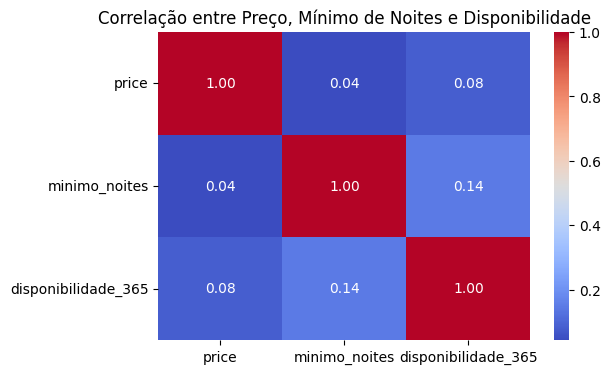

In [49]:
matrix_corr = df[['price', 'minimo_noites', 'disponibilidade_365']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(matrix_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Preço, Mínimo de Noites e Disponibilidade")
plt.show()

# 2a) Onde comprar imóveis?

#### Considerando que essa base de anúncios possuí só o valor de preços do anúncios, não consigo garantir quantos dias eles estão alocados por mês. Também não sei se o valor do anúncio é por dia ou se é pelo período total da disponibilidade minima. Ainda assim, apesar de ingênua, vou considerar o seguinte:

#### O tamanho médio dos aluguéis sejam próximos em cada bairro group
#### Os anúncios são alocados com uma mesma frequência

#### Então, pesquisei o preço do metro quadrado na internet e farei a seguinte recomendação:
Preço metro quadrado Manhattan: https://rocket.com/homes/market-reports/ny/manhattan

Preço metro quadrado Brooklyn: https://rocket.com/homes/market-reports/ny/brooklyn

Preço metro quadrado Queens: https://rocket.com/homes/market-reports/ny/queens

Preço metro quadrado Bronx: https://rocket.com/homes/market-reports/ny/bronx

Preço metro quadrado Staten Island: https://rocket.com/homes/market-reports/ny/staten-island

#### A partir do preço médio de cada bairro group, qual seria o valor se eu dividisse pelo preço médio do metro quadrado? Ou seja, qual é o maior preço de aluguel por metro quadrado entre os bairro groups?

### Eu recomendaria comprar no Bronx!

In [50]:
df = pandas.read_csv("teste_indicium_precificacao.csv")
df = df.dropna()
preco_metro_df = pandas.read_csv("preco_metro_ny.csv")

In [51]:
## Tirando os outliers mais altos:
quantidade_alta = df["price"].quantile(0.95)

# Filtrar o DataFrame para manter apenas os valores dentro do intervalo desejado
df_price_sem_altos = df[((df["price"] <= quantidade_alta))]

In [52]:
media_preco_bairro = df.groupby('bairro_group')['price'].mean().sort_values(ascending=False).reset_index()

In [53]:
media_preco_bairro = media_preco_bairro.merge(preco_metro_df, on="bairro_group")

In [54]:
media_preco_bairro["preco_anuncio_por_metro_quadrado"] = media_preco_bairro["price"]/media_preco_bairro["preco_metro_quadrado"]

In [55]:
media_preco_bairro

,bairro_group,price,preco_metro_quadrado,preco_anuncio_por_metro_quadrado
0,Manhattan,180.071596,1386,0.129922
1,Brooklyn,121.461613,721,0.168463
2,Queens,95.783683,523,0.183143
3,Staten Island,89.964968,402,0.223793
4,Bronx,79.558857,346,0.229939
